# Coins classification
---

Complete the following cells in order to classify the following coins images:

![coins](images/coins.png)

as follows:

![coins classification](images/coins_classification.png)

Large coins count as 5 units, small copper coins count as 0.5 units, while small silver coins count as 1 unit.

#### Basic imports

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

(718, 957, 3)


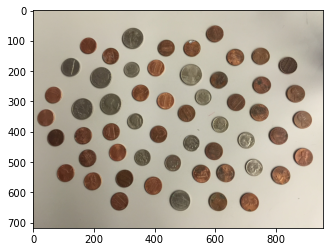

In [12]:
coins = cv2.imread('images/coins.png')
coins = cv2.cvtColor(coins, cv2.COLOR_BGR2RGB)

print(coins.shape)

plt.imshow(coins)

1. Select a color space that allows you to obtains a specific, and useful, characteristic from the coin image. Plot an image of said characteristic from the coins image. Remember to apply all the preprocessing steps that may be requiered.

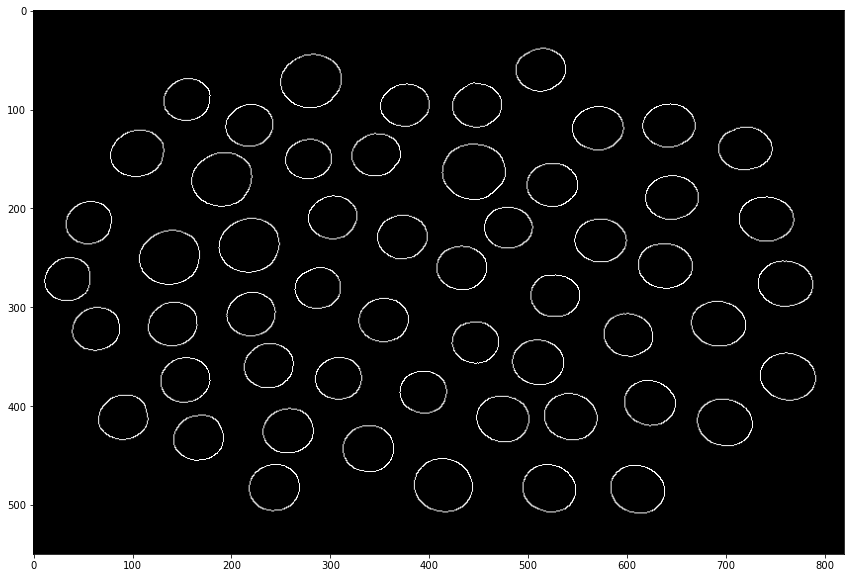

In [13]:
coins_copy = np.copy(coins)
coins_copy = cv2.resize(coins_copy, (820,550))

# TO DO: Obtain a characteristic and plot it.

gray_hand = cv2.cvtColor(coins_copy, cv2.COLOR_RGB2GRAY)

blur = cv2.GaussianBlur(gray_hand, (11,11), 0)

edges = cv2.Canny(blur, 20, 200)

retval, binary = cv2.threshold(edges, 0, 255, cv2.THRESH_OTSU)

f, (ax1) = plt.subplots(1, 1, figsize=(20,10))
ax1.imshow(binary, cmap='gray')


2. Obtain the coin contours and plot and image of all the contours. Add all the code cells that may be required.

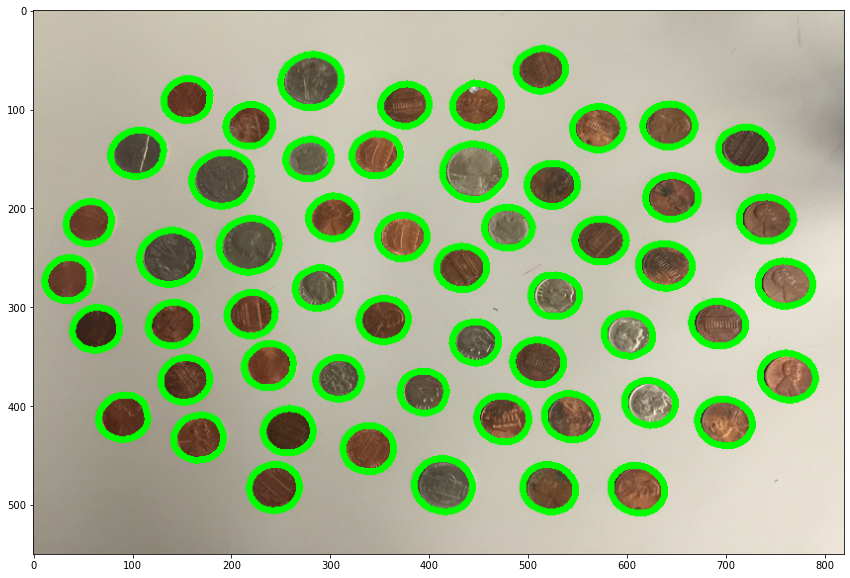

In [14]:
# TO DO: Plot an image of the contours of the coins.

(contours, _) = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

all_contours = cv2.drawContours(coins_copy, contours, -1, (0,255,0), 5)

f, (ax1) = plt.subplots(1, 1, figsize=(20,10))
ax1.imshow(all_contours, cmap='gray')

3. Using the contour features, obtain any feature that may be useful to classify the coins. Store the feature in a dictionary for future reference.

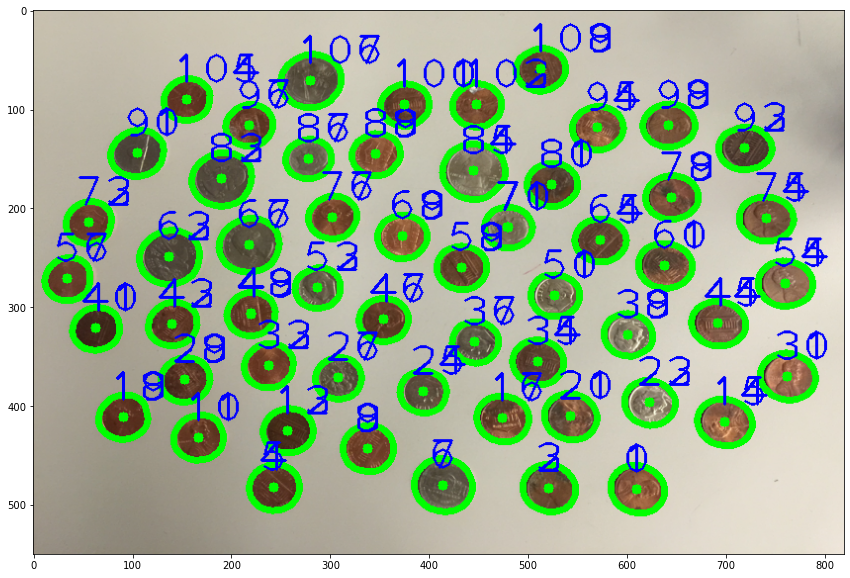

In [15]:
# TO DO: Obtain a useful contour feature to clasify the coins.
centroides = []
for idx, selected_contour in enumerate(contours):
    if(selected_contour is not None):
        moments = cv2.moments(selected_contour)

        cx = int(moments['m10']/moments['m00'])
        cy = int(moments['m01']/moments['m00'])

        centroides.append((cx, cy))

        cv2.circle(coins_copy, (cx, cy), 5, (0, 255, 0), -1)

        cv2.putText(coins_copy, str(idx), (cx-15, cy-15), cv2.FONT_HERSHEY_PLAIN, 3, (0, 0, 255), 2, cv2.LINE_8)

centroides1 = {}
for i in range(int(len(centroides)/2)):
    centroides1[i*1] = centroides[i*2]

areas = []
for idx, selected_contour in enumerate(contours):
    if(selected_contour is not None):
        area = cv2.arcLength(selected_contour, True)
        areas.append((area))

areas1 = {}
for i in range(int(len(areas)/2)):
    if (areas[i*2]>=areas[i*2+1]):
        areas1[i]=areas[i*2]
    else:
        areas1[i]=areas[i*2+1]

f, (ax1) = plt.subplots(1, 1, figsize=(20,10))
ax1.imshow(coins_copy, cmap='gray')

4. Separate the coins based on color. Obtain the average color of each coin, and store this information in a dictionary.

In [16]:
# TO DO: Obtain the average color of each coin, and store ir for future use.
mascara  = np.copy(coins) 
mascara = cv2.resize(mascara,(coins_copy.shape[1],coins_copy.shape[0]))

filtro  = np.copy(coins) 
filtro = cv2.resize(filtro,(coins_copy.shape[1],coins_copy.shape[0]))

hsv = cv2.cvtColor(mascara, cv2.COLOR_RGB2HSV)
kernel = np.ones((7,7), np.uint8)
s = hsv[:,:,1]
blur = cv2.GaussianBlur(s, (11,11), 0)
mask = cv2.inRange(blur, 90, 180)
ret2,th2 = cv2.threshold(mask, 0, 255, cv2.THRESH_OTSU)
bronce = cv2.morphologyEx(th2, cv2.MORPH_OPEN, kernel)

for i in range(0,55):
    if areas1[i] >= 187 and areas1[i] <= 199:
        cv2.putText(filtro, "5", (centroides1[i][0], centroides1[i][1]), cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 255), 2, cv2.LINE_8)
    elif areas1[i] >= 130 and areas1[i] <= 173 and bronce[centroides1[i][1]][centroides1[i][0]]==255:
        cv2.putText(filtro, "0.5", (centroides1[i][0], centroides1[i][1]), cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 255), 2, cv2.LINE_8)
    else:
        cv2.putText(filtro, "1", (centroides1[i][0], centroides1[i][1]), cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 255), 2, cv2.LINE_8)

5. Using the information that you generated, plot an image that adds a text with the value of each coin to the image at the position of each coin. Large coins are worth 5 units, small silver coins are worth 1 unit, while small copper coins are worth 0.5 units.

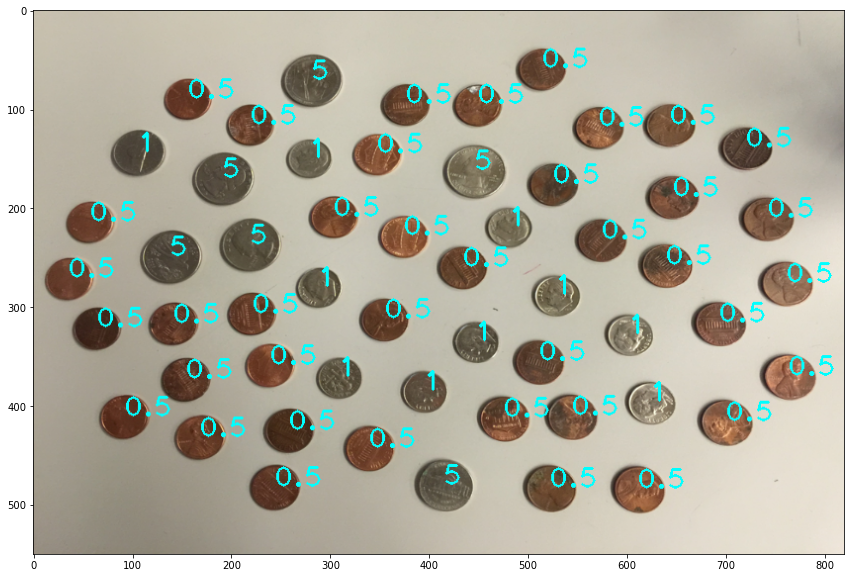

In [17]:
# TO DO: Using the dictionaries that you created, plot an image with the correct coin values
f, (ax1) = plt.subplots(1, 1, figsize=(20,10))
ax1.imshow(filtro, cmap='gray')